In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

# 太陽から100pc以内の星のHR図

In [2]:
df = pd.read_csv('gaia_edr3_100pc.csv')

## Sample selection
以下の条件を満たすのサンプルを選択
- 年周視差の相対誤差 $\sigma_\varpi/\varpi < 0.1$
- $G-G_{\mathrm{BR}}$の誤差が0.02未満

In [3]:
df['err_g_rp'] = 2.5/np.log(10.)*np.sqrt(1./df['phot_g_mean_flux_over_error']**2 + 1./df['phot_rp_mean_flux_over_error']**2) # error in the G - rp color
df = df[(df['parallax'] > 10.*df['parallax_error']) & (df['err_g_rp'] < 0.02)] #select the high SN samples
df['mag_g_abs'] = df['phot_g_mean_mag'] - 10. + 5.*np.log10(df['parallax']) # absolute magnitude in the Gaia G band

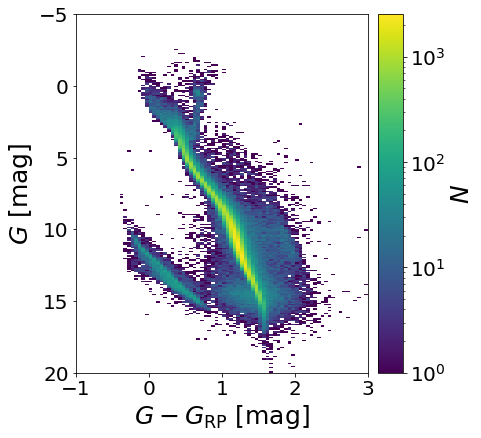

In [4]:
fig = plt.figure(figsize=[7, 6])
ax = fig.add_axes([0.15, 0.13, 0.58, 0.83])
ax_cb = fig.add_axes([0.75, 0.13, 0.05, 0.83])
hst = ax.hist2d(df['phot_g_mean_mag']-df['phot_rp_mean_mag'], df['mag_g_abs'],
                range=[[-1, 3], [-5, 20]], bins=[80, 250],
                norm=matplotlib.colors.LogNorm(),
                rasterized=True
               )
fig.colorbar(hst[3], cax=ax_cb, ax=ax)
ax.set_xlim(-1, 3)
ax.set_ylim(20, -5)
ax.set_xlabel(r'$G - G_{\mathrm{RP}}$ [mag]', fontsize=25)
ax.set_ylabel(r'$G$ [mag]', fontsize=25)
ax_cb.set_ylabel(r'$N$', fontsize=25)
ax.tick_params(labelsize=20)
ax_cb.tick_params(labelsize=20)

fig.savefig('HR_diagram_gaia_100pc.pdf', )

# Gaia EDR3カタログからランダムに選んだ星のHR図

In [5]:
df = pd.read_csv('gaia_edr3_rand.csv')

In [6]:
df['err_g_rp'] = 2.5/np.log(10.)*np.sqrt(1./df['phot_g_mean_flux_over_error']**2 + 1./df['phot_rp_mean_flux_over_error']**2) # error in the G - rp color
df = df[(df['parallax'] > 10.*df['parallax_error']) & (df['err_g_rp'] < 0.02)] #select the high SN samples
df['mag_g_abs'] = df['phot_g_mean_mag'] - 10. + 5.*np.log10(df['parallax']) # absolute magnitude in the Gaia G band

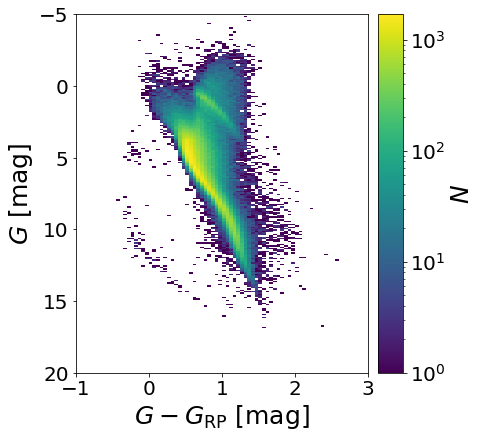

In [7]:
fig = plt.figure(figsize=[7, 6])
ax = fig.add_axes([0.15, 0.13, 0.58, 0.83])
ax_cb = fig.add_axes([0.75, 0.13, 0.05, 0.83])
hst = ax.hist2d(df['phot_g_mean_mag']-df['phot_rp_mean_mag'], df['mag_g_abs'],
                range=[[-1, 3], [-5, 20]], bins=[80, 250],
                norm=matplotlib.colors.LogNorm(),
                rasterized=True
               )
fig.colorbar(hst[3], cax=ax_cb, ax=ax)
ax.set_xlim(-1, 3)
ax.set_ylim(20, -5)
ax.set_xlabel(r'$G - G_{\mathrm{RP}}$ [mag]', fontsize=25)
ax.set_ylabel(r'$G$ [mag]', fontsize=25)
ax_cb.set_ylabel(r'$N$', fontsize=25)
ax.tick_params(labelsize=20)
ax_cb.tick_params(labelsize=20)

fig.savefig('HR_diagram_gaia_rand.pdf', )